<a href="https://colab.research.google.com/github/irinap9270/hg_ml/blob/main/%08Ch6-3.%20PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# """PCA(주성분 분석 알고리즘)"""

> 대표적인 차원 축소 알고리즘

차원 축소: 데이터를 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 학습 모델의 성능을 향상시킴

In [1]:
# 과일 데이터를 다운로드 하여 넘파이 배열로 저장
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

# PCA클래스 임포트
from sklearn.decomposition import PCA
# n_components; 주성분의 개수
pca = PCA(n_components=50)
pca.fit(fruits_2d)

# 주성분 크기 확인
print(pca.components_.shape)

--2024-04-13 01:00:57--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-04-13 01:00:57--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-04-13 01:00:58--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
# 주성분을 이용하여 원본 데이터 차원을 줄임
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

# 원본 데이터 재구성; 특성을 복원할 수도 있음
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 50)
(300, 10000)


> 설명된 분산

: 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

: 설명된 분산을 모두 합하면 총 분산 비율을 구할 수 있음

0.9215684283707307


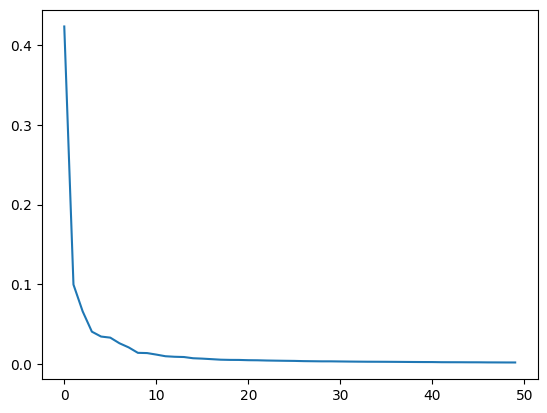

In [6]:
# 총 분산 비율 출력
print(np.sum(pca.explained_variance_ratio_))
# 설명된 분산 그래프를 이용하여 적절한 주성분 개수 찾기
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.show()

> 로지스틱 회귀 모델을 이용하여 원본 데이터와 PCA로 축소한 데이터를 학습해보자.

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# 타겟 데이터 생성; 사과 0, 파인애플 1, 바나나 2
target = np.array([0]*100 + [1]*100 + [2]*100)

# 원본 데이터로 학습
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)  # 교차 검증 수행
print(np.mean(scores['test_score']))  # 교차 검증 점수 출력
print(np.mean(scores['fit_time']))  # 훈련 시간 출력

# PCA로 축소한 데이터로 학습
pca = PCA(n_components=0.5) # 설명된 분산의 0.5에 달하는 주성분을 찾음
pca.fit(fruits_2d)
print(pca.n_components_)

0.9966666666666667
1.3004956245422363
2


In [8]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
scores = cross_validate(lr, fruits_pca, target)  # 교차 검증 수행
print(np.mean(scores['test_score']))  # 교차 검증 점수 출력
print(np.mean(scores['fit_time']))  # 훈련 시간 출력

(300, 2)
0.9933333333333334
0.027827072143554687


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [10]:
# PCA로 축소한 데이터로 k-mean 알고리즘 학습
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))  # fruits_pca로 찾은 클러스터가 포함하는 샘플 개수 출력

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


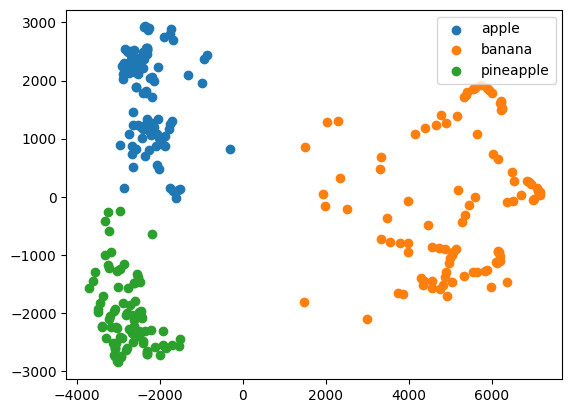

In [14]:
# 클러스터별로 나눈 산점도 그래프
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()